# Carrega os módulos necessários

In [4]:
from pathlib import Path
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import statsmodels.api as sm


# Define o caminho relativo para o arquivo Excel

In [5]:
path_to_capm = Path("../../data/raw/capm.xls")
path_to_capm

PosixPath('../../data/raw/capm.xls')

# Leitura dos dados da planilha Excel

In [6]:
dados_capm = pd.read_excel(path_to_capm, engine='xlrd')

# Exibe a estrutura dos dados

In [7]:
print(dados_capm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       194 non-null    datetime64[ns]
 1   SANDP      194 non-null    float64       
 2   FORD       194 non-null    float64       
 3   GE         194 non-null    float64       
 4   MICROSOFT  194 non-null    float64       
 5   ORACLE     194 non-null    float64       
 6   USTB3M     194 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 10.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       194 non-null    datetime64[ns]
 1   SANDP      194 non-null    float64       
 2   FORD       194 non-null    float64       
 3   GE         194 non-null    float64       
 4   MICROSOFT  194 no

# Exibe as 5 primeiras e ultimas linhas dos dados

In [8]:
print(dados_capm)

          Date        SANDP   FORD         GE  MICROSOFT     ORACLE  USTB3M
0   2002-01-01  1130.199951  15.30  37.150002  31.855000  17.260000    1.68
1   2002-02-01  1106.729980  14.88  38.500000  29.170000  16.620001    1.76
2   2002-03-01  1147.390015  16.49  37.400002  30.155001  12.800000    1.83
3   2002-04-01  1076.920044  16.00  31.549999  26.129999  10.040000    1.75
4   2002-05-01  1067.140015  17.65  31.139999  25.455000   7.920000    1.76
..         ...          ...    ...        ...        ...        ...     ...
189 2017-10-01  2583.209961  12.27  20.160000  83.180000  50.900002    1.09
190 2017-11-01  2645.100098  12.52  18.290001  84.169998  49.060001    1.25
191 2017-12-01  2683.729980  12.49  17.450001  85.540001  47.279999    1.34
192 2018-01-01  2816.449951  10.97  16.170000  95.010002  51.590000    1.43
193 2018-02-01  2715.219971  10.61  14.110000  93.769997  50.669998    1.59

[194 rows x 7 columns]
          Date        SANDP   FORD         GE  MICROSOFT     ORA

# Cálculo dos retornos compostos continuamente (logarítmicos) e adiciona os retornos à data frame

In [9]:
dados_capm['ret_sp500'] = np.log(dados_capm['SANDP']).diff() * 100
dados_capm['ret_ford'] = np.log(dados_capm['FORD']).diff() * 100
dados_capm['ret_ge'] = np.log(dados_capm['GE']).diff() * 100
dados_capm['ret_microsoft'] = np.log(dados_capm['MICROSOFT']).diff() * 100
dados_capm['ret_oracle'] = np.log(dados_capm['ORACLE']).diff() * 100

# Verificando a estrutura dos dados após o cálculo dos retornos

In [10]:
print(dados_capm)

          Date        SANDP   FORD         GE  MICROSOFT     ORACLE  USTB3M  ret_sp500   ret_ford     ret_ge  ret_microsoft  ret_oracle
0   2002-01-01  1130.199951  15.30  37.150002  31.855000  17.260000    1.68        NaN        NaN        NaN            NaN         NaN
1   2002-02-01  1106.729980  14.88  38.500000  29.170000  16.620001    1.76  -2.098486  -2.783480   3.569442      -8.805357   -3.778484
2   2002-03-01  1147.390015  16.49  37.400002  30.155001  12.800000    1.83   3.608011  10.273611  -2.898748       3.321000  -26.116168
3   2002-04-01  1076.920044  16.00  31.549999  26.129999  10.040000    1.75  -6.338466  -3.016541 -17.009720     -14.326674  -24.286806
4   2002-05-01  1067.140015  17.65  31.139999  25.455000   7.920000    1.76  -0.912297   9.814706  -1.308042      -2.617185  -23.718591
..         ...          ...    ...        ...        ...        ...     ...        ...        ...        ...            ...         ...
189 2017-10-01  2583.209961  12.27  20.160000  8

# Ajusta a série anual de rendimentos para base mensal

In [11]:
dados_capm['ustb3m'] = dados_capm['USTB3M'] / 12

# Cálculo dos retornos excedentes e os adiciona à data frame

In [12]:
dados_capm['retexc_sp500'] = dados_capm['ret_sp500'] - dados_capm['ustb3m']
dados_capm['retexc_ford'] = dados_capm['ret_ford'] - dados_capm['ustb3m']
dados_capm['retexc_ge'] = dados_capm['ret_ge'] - dados_capm['ustb3m']
dados_capm['retexc_microsoft'] = dados_capm['ret_microsoft'] - dados_capm['ustb3m']
dados_capm['retexc_oracle'] = dados_capm['ret_oracle'] - dados_capm['ustb3m']

# Verifica a estrutura dos dados após o cálculo dos retornos excedentes

In [13]:
print(dados_capm)

          Date        SANDP   FORD         GE  MICROSOFT     ORACLE  ...    ustb3m  retexc_sp500  retexc_ford  retexc_ge  retexc_microsoft  retexc_oracle
0   2002-01-01  1130.199951  15.30  37.150002  31.855000  17.260000  ...  0.140000           NaN          NaN        NaN               NaN            NaN
1   2002-02-01  1106.729980  14.88  38.500000  29.170000  16.620001  ...  0.146667     -2.245153    -2.930147   3.422775         -8.952024      -3.925150
2   2002-03-01  1147.390015  16.49  37.400002  30.155001  12.800000  ...  0.152500      3.455511    10.121111  -3.051248          3.168500     -26.268668
3   2002-04-01  1076.920044  16.00  31.549999  26.129999  10.040000  ...  0.145833     -6.484299    -3.162375 -17.155553        -14.472507     -24.432639
4   2002-05-01  1067.140015  17.65  31.139999  25.455000   7.920000  ...  0.146667     -1.058964     9.668039  -1.454709         -2.763852     -23.865258
..         ...          ...    ...        ...        ...        ...  ...    

# Estatísticas descritivas dos retornos excedentes da Ford

In [15]:
ford_stats = dados_capm['retexc_ford'].describe()
ford_skew = skew(dados_capm['retexc_ford'].dropna())
ford_kurt = kurtosis(dados_capm['retexc_ford'].dropna(), fisher=False)

ford_summary = pd.Series({
    'media': ford_stats['mean'],
    'mediana': ford_stats['50%'],
    'desvio_padrao': ford_stats['std'],
    'minimo': ford_stats['min'],
    'maximo': ford_stats['max'],
    'curtose': ford_kurt,
    'assimetria': ford_skew
})

print(ford_summary)

media            -0.292935
mediana          -1.061981
desvio_padrao    13.451561
minimo          -86.533208
maximo           82.130339
curtose          17.801218
assimetria        0.054578
dtype: float64
media            -0.292935
mediana          -1.061981
desvio_padrao    13.451561
minimo          -86.533208
maximo           82.130339
curtose          17.801218
assimetria        0.054578
dtype: float64


# Estatísticas descritivas dos retornos excedentes do S&P 500

In [16]:
sp500_stats = dados_capm['retexc_sp500'].describe()
sp500_skew = skew(dados_capm['retexc_sp500'].dropna())
sp500_kurt = kurtosis(dados_capm['retexc_sp500'].dropna(), fisher=False)

sp500_summary = pd.Series({
    'media': sp500_stats['mean'],
    'mediana': sp500_stats['50%'],
    'desvio_padrao': sp500_stats['std'],
    'minimo': sp500_stats['min'],
    'maximo': sp500_stats['max'],
    'curtose': sp500_kurt,
    'assimetria': sp500_skew
})

print(sp500_summary)

media             0.350865
mediana           0.949000
desvio_padrao     4.134660
minimo          -18.441472
maximo           10.063874
curtose           5.332349
assimetria       -0.925419
dtype: float64
media             0.350865
mediana           0.949000
desvio_padrao     4.134660
minimo          -18.441472
maximo           10.063874
curtose           5.332349
assimetria       -0.925419
dtype: float64


# Gráfico de dispersão dos retornos excedentes da Ford vs. S&P 500

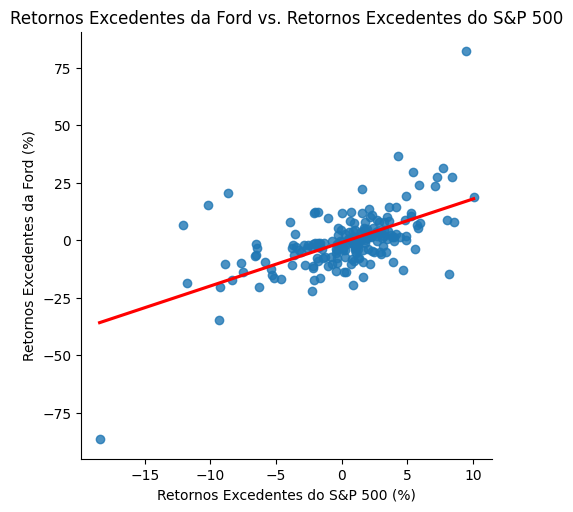

In [17]:
sns.lmplot(x='retexc_sp500', y='retexc_ford', data=dados_capm, line_kws={'color': 'red'}, ci=None)
plt.title('Retornos Excedentes da Ford vs. Retornos Excedentes do S&P 500')
plt.xlabel('Retornos Excedentes do S&P 500 (%)')
plt.ylabel('Retornos Excedentes da Ford (%)')
plt.show()

# Preparação dos dados para estimação do CAPM

In [18]:
X = dados_capm['retexc_sp500'].dropna()
y = dados_capm['retexc_ford'].dropna()

# Adiciona uma constante para o termo de interceptação
X = sm.add_constant(X)

# Estimação do modelo CAPM

In [19]:
capm_model = sm.OLS(y, X).fit()

# Exibe os resultados da estimação

In [20]:
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:            retexc_ford   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     97.26
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           8.36e-19
Time:                        14:15:02   Log-Likelihood:                -735.26
No. Observations:                 193   AIC:                             1475.
Df Residuals:                     191   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9560      0.793     -1.205   

# Intervalos de confiança para os parâmetros estimados

In [21]:
print(capm_model.conf_int())

                     0         1
const        -2.520315  0.608346
retexc_sp500  1.511791  2.267719
                     0         1
const        -2.520315  0.608346
retexc_sp500  1.511791  2.267719


# Simulação dos retornos excedentes da Ford com base no modelo estimado

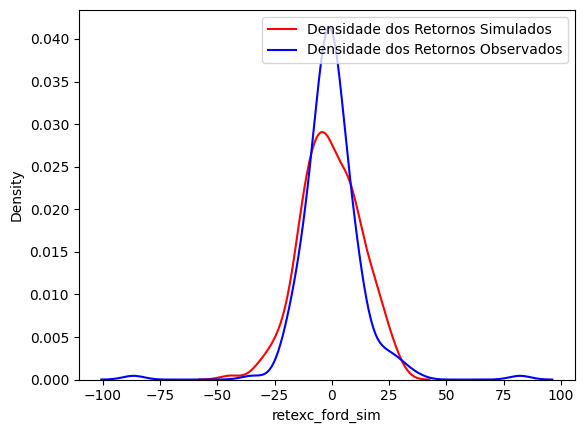

In [22]:
retexc_ford_sim = capm_model.params['const'] + capm_model.params['retexc_sp500'] * dados_capm['retexc_sp500'] + np.random.normal(0, capm_model.resid.std(), len(dados_capm))

# Adiciona os retornos simulados ao DataFrame
dados_capm['retexc_ford_sim'] = retexc_ford_sim

# Gráfico comparando as densidades dos retornos simulados e observados
sns.kdeplot(dados_capm['retexc_ford_sim'].dropna(), color='red', label='Densidade dos Retornos Simulados')
sns.kdeplot(dados_capm['retexc_ford'].dropna(), color='blue', label='Densidade dos Retornos Observados')
plt.legend()
plt.show()